<a href="https://colab.research.google.com/github/alipk26/Submission-Proyek-Akhir-Image-Classification-Model-Deployment/blob/main/Submission_Proyek_Akhir_Image_Classification_Model_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import library

In [ ]:
import numpy as np
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

#mengelola dataset

In [ ]:
train = ImageDataGenerator(rescale=1/255,validation_split=0.2)
test = ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [ ]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/cheetahorheyna/train", 
                                          target_size=(200, 200), class_mode = 'binary')
val_set = test.flow_from_directory("/content/drive/MyDrive/cheetahorheyna/validation",
                                   target_size=(200, 200), class_mode = 'binary')

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


#fungsi callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.80 and logs.get('val_accuracy')>0.80):
      print("\nAkurasi dan validasi telah mencapai nilai > 80%!")
      self.model.stop_training = True
callbacks = myCallback()

#model sequential dan Conv2D Maxpooling Layer.

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#fungsi fit

In [ ]:
history = model.fit(train_dataset, epochs=100, validation_data = val_set, 
          callbacks=[callbacks])

Epoch 1/100
57/57 [==============================] - 193s 3s/step - loss: 0.6185 - accuracy: 0.6311 - val_loss: 0.4115 - val_accuracy: 0.7900
Epoch 2/100
57/57 [==============================] - ETA: 0s - loss: 0.4045 - accuracy: 0.8083
Akurasi dan validasi telah mencapai nilai > 80%!
57/57 [==============================] - 168s 3s/step - loss: 0.4045 - accuracy: 0.8083 - val_loss: 0.3346 - val_accuracy: 0.8450


#plot loss

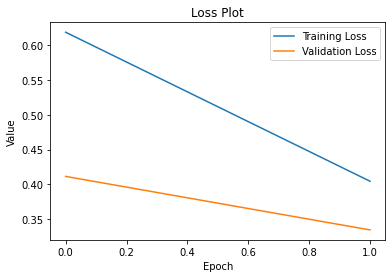

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

#plot accuracy

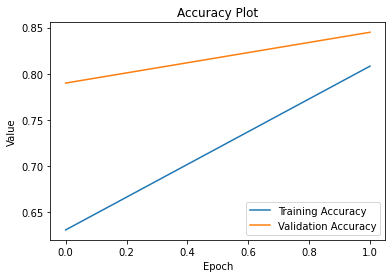

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

#menyimpan model dengan format vegs.tflite

In [ ]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)
 
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

27186176